# Lecture 3 notebook part 1: MNIST classifier

## Introduction to TensorFlow and Deep Learning

## IADS Summer School 2023

### Dr Michael Fairbank, University of Essex, UK

- Email: m.fairbank@essex.ac.uk
- This is a Jupyter Notebook to accompany Lecture 3 of the course

# MNIST digits dataset

- First load and view the MNIST digits dataset
- There are 60000 images in this dataset, but we will only view the first 25 of them:


2023-08-30 16:06:47.752319: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


11490434/11490434 [==============================] - 1s 0us/step
test_images shape (10000, 28, 28) train_images shape (60000, 28, 28)


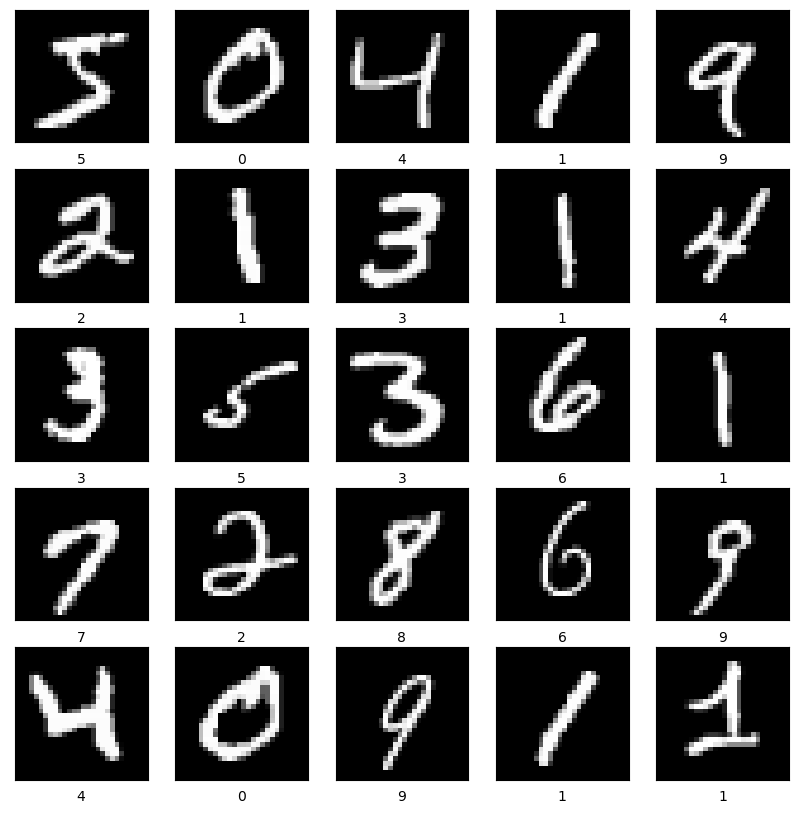

In [1]:
# Load and visualise the MNIST digits
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(train_images0, train_labels0),(test_images0, test_labels0) = mnist.load_data()

print("test_images shape",test_images0.shape,"train_images shape",train_images0.shape)
class_names=["0","1","2","3","4","5","6","7","8","9"]
import matplotlib.pyplot as plt
# plot first few images
plt.figure(figsize=(10,10))
for i in range(25):
    # define subplot
    plt.subplot(5,5,i+1)
    # plot raw pixel data
    plt.imshow(train_images0[i], cmap=plt.get_cmap('gray'))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # Add a label underneath...
    plt.xlabel(class_names[train_labels0[i]])
plt.show()

### Next build a neural-network classifier for these digits.

- We will build a keras model, with the higher-level API concepts, taught in lecture 2

In [21]:
from tensorflow import keras
# Each MNIST images are 28*28.  Therefore if there are N images, then the 
# shape of the numpy array holding the images is N*28*28
# We will reshape that here to be N*784, using a numpy reshape.
# Note that this flattens each image into a single vector length 784.
test_images=test_images0.reshape(10000,784) # 10000 test patterns
train_images=train_images0.reshape(60000,784) # 60000 train patterns

# Also rescale greyscale from 8 bit to floating point (by dividing by 255)
test_images=test_images/255.0
train_images=train_images/255.0 

# Create the model
layer1=keras.layers.Dense(10, activation="sigmoid")
layer2=keras.layers.Dense(10, activation="softmax")

keras_model=keras.models.Sequential([layer1,layer2])
keras_model.build(input_shape=[None,784])


## View the keras model summary information

- This shows you how many layers your neural network has, and how many weights, etc.

In [22]:
# View the model summary information...
keras_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                7850      
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
Total params: 7960 (31.09 KB)
Trainable params: 7960 (31.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Train the Keras model

- We will use SGD optimiser (ordinary gradient descent)
- We will use Cross Entropy loss ("SparseCategoricalCrossentropy")
- We will run 200 training iterations (epochs)...

In [23]:
optimizer = tf.keras.optimizers.SGD(0.5)
keras_model.compile(
    optimizer=optimizer,  # Optimizer
    # Loss function to minimize
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    # List of metrics to monitor
    metrics=[keras.metrics.SparseCategoricalAccuracy()]
) 
# Train loop
history = keras_model.fit(
    train_images,
    train_labels0,
    batch_size=len(train_images),
    epochs=200,
    validation_data=(test_images, test_labels0),
)


Epoch 1/200
1/1 [==============================] - 2s 2s/step - loss: 2.4922 - sparse_categorical_accuracy: 0.0960 - val_loss: 2.3528 - val_sparse_categorical_accuracy: 0.1232
Epoch 2/200
1/1 [==============================] - 0s 462ms/step - loss: 2.3559 - sparse_categorical_accuracy: 0.1265 - val_loss: 2.2886 - val_sparse_categorical_accuracy: 0.1886
Epoch 3/200
1/1 [==============================] - 0s 499ms/step - loss: 2.2917 - sparse_categorical_accuracy: 0.1938 - val_loss: 2.2448 - val_sparse_categorical_accuracy: 0.2394
Epoch 4/200
1/1 [==============================] - 0s 386ms/step - loss: 2.2480 - sparse_categorical_accuracy: 0.2395 - val_loss: 2.2090 - val_sparse_categorical_accuracy: 0.2841
Epoch 5/200
1/1 [==============================] - 0s 259ms/step - loss: 2.2124 - sparse_categorical_accuracy: 0.2837 - val_loss: 2.1773 - val_sparse_categorical_accuracy: 0.3236
Epoch 6/200
1/1 [==============================] - 0s 245ms/step - loss: 2.1810 - sparse_categorical_accurac

1/1 [==============================] - 0s 226ms/step - loss: 1.4203 - sparse_categorical_accuracy: 0.7194 - val_loss: 1.4002 - val_sparse_categorical_accuracy: 0.7205
Epoch 47/200
1/1 [==============================] - 0s 232ms/step - loss: 1.4073 - sparse_categorical_accuracy: 0.7227 - val_loss: 1.3875 - val_sparse_categorical_accuracy: 0.7239
Epoch 48/200
1/1 [==============================] - 0s 254ms/step - loss: 1.3946 - sparse_categorical_accuracy: 0.7254 - val_loss: 1.3750 - val_sparse_categorical_accuracy: 0.7269
Epoch 49/200
1/1 [==============================] - 0s 248ms/step - loss: 1.3821 - sparse_categorical_accuracy: 0.7283 - val_loss: 1.3627 - val_sparse_categorical_accuracy: 0.7297
Epoch 50/200
1/1 [==============================] - 0s 288ms/step - loss: 1.3699 - sparse_categorical_accuracy: 0.7311 - val_loss: 1.3506 - val_sparse_categorical_accuracy: 0.7326
Epoch 51/200
1/1 [==============================] - 0s 302ms/step - loss: 1.3578 - sparse_categorical_accuracy: 0

1/1 [==============================] - 0s 241ms/step - loss: 1.0027 - sparse_categorical_accuracy: 0.8060 - val_loss: 0.9876 - val_sparse_categorical_accuracy: 0.8099
Epoch 92/200
1/1 [==============================] - 0s 238ms/step - loss: 0.9963 - sparse_categorical_accuracy: 0.8073 - val_loss: 0.9812 - val_sparse_categorical_accuracy: 0.8107
Epoch 93/200
1/1 [==============================] - 0s 268ms/step - loss: 0.9899 - sparse_categorical_accuracy: 0.8085 - val_loss: 0.9749 - val_sparse_categorical_accuracy: 0.8114
Epoch 94/200
1/1 [==============================] - 0s 235ms/step - loss: 0.9836 - sparse_categorical_accuracy: 0.8095 - val_loss: 0.9686 - val_sparse_categorical_accuracy: 0.8127
Epoch 95/200
1/1 [==============================] - 0s 234ms/step - loss: 0.9774 - sparse_categorical_accuracy: 0.8107 - val_loss: 0.9625 - val_sparse_categorical_accuracy: 0.8132
Epoch 96/200
1/1 [==============================] - 0s 236ms/step - loss: 0.9713 - sparse_categorical_accuracy: 0

1/1 [==============================] - 0s 230ms/step - loss: 0.7824 - sparse_categorical_accuracy: 0.8444 - val_loss: 0.7689 - val_sparse_categorical_accuracy: 0.8495
Epoch 137/200
1/1 [==============================] - 0s 226ms/step - loss: 0.7788 - sparse_categorical_accuracy: 0.8451 - val_loss: 0.7653 - val_sparse_categorical_accuracy: 0.8498
Epoch 138/200
1/1 [==============================] - 0s 253ms/step - loss: 0.7753 - sparse_categorical_accuracy: 0.8455 - val_loss: 0.7617 - val_sparse_categorical_accuracy: 0.8503
Epoch 139/200
1/1 [==============================] - 0s 239ms/step - loss: 0.7717 - sparse_categorical_accuracy: 0.8460 - val_loss: 0.7582 - val_sparse_categorical_accuracy: 0.8507
Epoch 140/200
1/1 [==============================] - 0s 233ms/step - loss: 0.7683 - sparse_categorical_accuracy: 0.8468 - val_loss: 0.7548 - val_sparse_categorical_accuracy: 0.8514
Epoch 141/200
1/1 [==============================] - 0s 264ms/step - loss: 0.7648 - sparse_categorical_accura

1/1 [==============================] - 0s 233ms/step - loss: 0.6550 - sparse_categorical_accuracy: 0.8622 - val_loss: 0.6424 - val_sparse_categorical_accuracy: 0.8648
Epoch 182/200
1/1 [==============================] - 0s 250ms/step - loss: 0.6528 - sparse_categorical_accuracy: 0.8626 - val_loss: 0.6402 - val_sparse_categorical_accuracy: 0.8654
Epoch 183/200
1/1 [==============================] - 0s 247ms/step - loss: 0.6506 - sparse_categorical_accuracy: 0.8629 - val_loss: 0.6380 - val_sparse_categorical_accuracy: 0.8658
Epoch 184/200
1/1 [==============================] - 0s 231ms/step - loss: 0.6485 - sparse_categorical_accuracy: 0.8631 - val_loss: 0.6359 - val_sparse_categorical_accuracy: 0.8662
Epoch 185/200
1/1 [==============================] - 0s 253ms/step - loss: 0.6464 - sparse_categorical_accuracy: 0.8633 - val_loss: 0.6338 - val_sparse_categorical_accuracy: 0.8669
Epoch 186/200
1/1 [==============================] - 0s 232ms/step - loss: 0.6443 - sparse_categorical_accura

## View the training performance

- When the Keras fit loop runs, it returns a "history" object, which includes a dictionary of the trianing history.

- Hence we can plot graphs of the training performance (Accuracy, Loss), for both the "Training" and "Validation" sets....

In [24]:
# first show keys for data series recorded by fit loop:
for item in history.history:
    print("Key:",item)

Key: loss
Key: sparse_categorical_accuracy
Key: val_loss
Key: val_sparse_categorical_accuracy


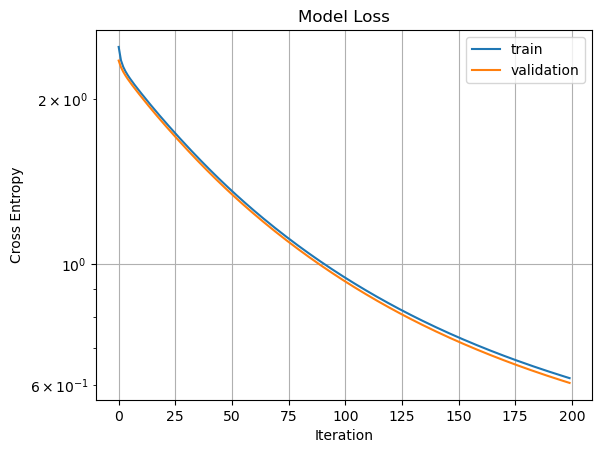

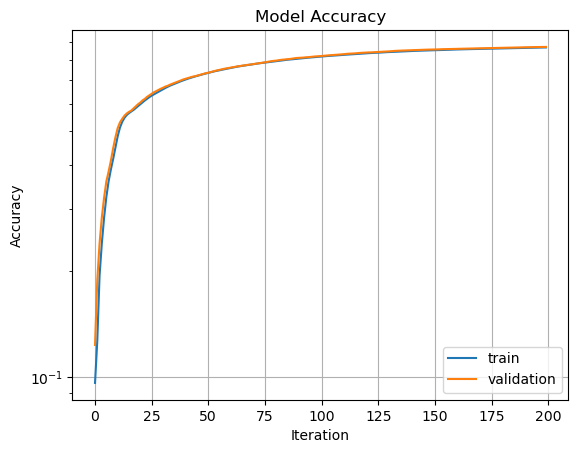

In [25]:

plt.plot(history.history['loss'],label="train")
plt.plot(history.history['val_loss'],label="validation")
plt.title('Model Loss')
plt.yscale('log')
plt.ylabel('Cross Entropy')
plt.xlabel('Iteration')
plt.grid()
plt.legend()
plt.show()

plt.plot(history.history['sparse_categorical_accuracy'],label="train")
plt.plot(history.history['val_sparse_categorical_accuracy'],label="validation")
plt.title('Model Accuracy')
plt.yscale('log')
plt.ylabel('Accuracy')
plt.xlabel('Iteration')
plt.grid()
plt.legend()
plt.show()

## Inspect how well the system is working on a sample of 25 new images (from the test set)...
- The test set has a lot of images in it, but we can only view 25 at a time.
- Hence rerun this code block several times, to get a different random set of samples from the test set

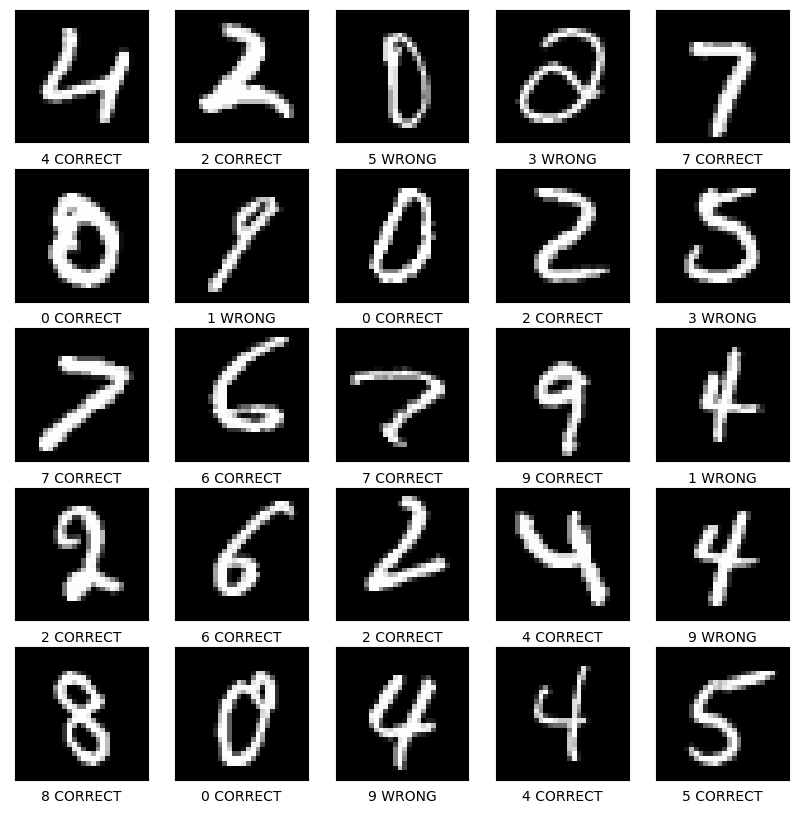

72.0


In [29]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10,10))
# plot 25 random images from the test set.
first_index=np.random.randint(len(test_images)-25)

# let's find out how accurate we are
correct = 0

for i in range(first_index,first_index+25):
    # define subplot
    plt.subplot(5,5,i+1-first_index)
    # plot raw pixel data
    plt.imshow(test_images0[i], cmap=plt.get_cmap('gray'))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if class_names!=None:
        prediction=keras_model(test_images[i:i+1])[0,:] # This will be a vector of length 10
        prediction_class=np.argmax(prediction)  # Pick the index of the largest element of the length-10 vector
        # Add a label underneath...
        true_label=test_labels0[i]
        class_name=class_names[prediction_class]
        plt.xlabel(class_name+" "+("CORRECT" if prediction_class==true_label else "WRONG"))
        if prediction_class==true_label:
            correct += 1
plt.show()
percentage_correct = correct/25*100
print(percentage_correct)